# **Limpieza de datos** 
Durante el seminario de exploración de datos dirigido por el profesor Santiago Echeverry para el semillero GEA, se propuso como actividad inicial la creación de una base de datos compuesta por varias tablas. En este proceso, se llevó a cabo la limpieza de datos de la tabla **Víctimas de Violencia Sexual** y de la tabla **Casos de Violencia Sexual**, para posteriormente cargarla en el gestor de bases de datos PostgreSQL.

Inicialmente, se realizó una descripción de los atributos para la entidad **Víctimas**, con el fin de identificar los tipos de datos manejados y su comportamiento en la base de datos. Para ello, se exportaron los datos y se utilizó la función **info()** para realizar una primera exploración, visualizando la cantidad de variables y registros, así como la cantidad de datos faltantes y el tipo de dato manejado por atributo.

## **Víctimas de Violencia Sexual** 
La tabla **Víctimas de Violencia Sexual** consta de **20 atributos**, previamente descritos, y contiene un total de **17331 registros**.
(Es importante señalar que por practicidad en el codigo se editaron los nombres de algunas variables para su fácil manejo)

In [5]:
import pandas as pd
import openpyxl
df = pd.read_excel('C:\\Users\\Usuario\\Downloads\\GEA\\Dataset\\VictimasVS_202309.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Caso                17331 non-null  int64  
 1   DANE                   17331 non-null  object 
 2   Municipio              17331 non-null  object 
 3   Departamento           17331 non-null  object 
 4   Anho                   17331 non-null  int64  
 5   Mes                    17331 non-null  int64  
 6   Dia                    17331 non-null  int64  
 7   ID_Persona             17331 non-null  int64  
 8   Sexo                   17331 non-null  object 
 9   Etnia                  1781 non-null   object 
 10  Ocupacion              17331 non-null  object 
 11  Tipo_Victima           17331 non-null  object 
 12  Tipo_Poblacion         360 non-null    object 
 13  Militante              20 non-null     object 
 14  Tipo_Militante         68 non-null     object 
 15  De

### ***Descripción Variables***
1. **ID_Caso:** Identificador único del caso, probablemente asignado secuencialmente a cada caso registrado.
2. **DANE:** Código DANE del municipio donde ocurrió el acontecimiento.
3. **Municipio:** Nombre del municipio donde ocurrió el acontecimiento.
4. **Departamento:** Nombre del departamento donde ocurrió el acontecimiento.
5. **Año:** Año en que ocurrió el acontecimiento.
6. **Mes:** Mes en que ocurrió el acontecimiento.
7. **Dia:** Día en que ocurrió el acontecimiento.
8. **ID_Persona:** Identificador único de la víctima relacionada con el caso.
9. **Sexo:** Género biológico de la víctima.
10. **Etnia:** Identificación étnica o racial de la víctima.
11. **Ocupacion:** Ocupación de la víctima.
12. **Tipo_Victima** Clasifica la victima como civil o combatiente (participante de grupo armado).
13. **Tipo_Poblacion** Tipo de Población Vulnerable
14. **Militante** Indicador de si la víctima era un militante político.
15. **Tipo_Militante** Fuerza o Grupo Armado Organizado al que Pertenece el Combatiente.
16. **Descripcion_Militante** Descripción Fuerza o Grupo Armado Organizado al que Pertenece el Combatiente.
17. **Estado** Situación Actual de la Víctima:
18. **Edad:** Edad de la víctima en el momento del acontecimiento.
19. **Latitud:** Coordenada de latitud del lugar del acontecimiento.
20. **Longitud:** Coordenada de longitud del lugar del acontecimiento.

### ***Valores faltantes***
Existen diversos tipos de datos faltantes en la información. Por un lado tenemos para los campos de municipio, sexo, tipo de víctima y ocupación, encontramos registros con la etiqueta "SIN INFORMACIÓN". Asimismo, en los campos correspondientes a año, mes y día, encontramos registros con valores como "0000" y "00" (que Python interpreta únicamente como 0). Además, hay registros que están completamente en blanco, lo que conocemos como valores NA o NULL. En el código anterior, se han registrado un total de **86777 datos faltantes**. Al analizar los registros, observamos que todos ellos tienen al menos un dato faltante.

In [2]:
print(df.isna().sum().sum())

86777


In [3]:
registros_na = df.isna().any(axis=1).sum() 
print(registros_na)

17331


#### **Tratamiento Valores NA**
Del análisis siguiente, se observa que los atributos **Etnia**, **Tipo_Poblacion**, **Militante**, **Tipo_Militante** y **Descripcion_Militante** presentan porcentajes significativamente altos de datos faltantes, por lo que se ha decidido eliminarlos. En cuanto al aproximadamente 13.96% de los datos faltantes en la variable **Edad**, se ha optado por etiquetarlos como "SIN INFORMACIÓN".

In [7]:
proporcion_na_por_columna = (df.isna().sum(axis=0))/(df.shape[0])
print(proporcion_na_por_columna)

ID_Caso                  0.000000
DANE                     0.000000
Municipio                0.000000
Departamento             0.000000
Anho                     0.000000
Mes                      0.000000
Dia                      0.000000
ID_Persona               0.000000
Sexo                     0.000000
Etnia                    0.897236
Ocupacion                0.000000
Tipo_Victima             0.000000
Tipo_Poblacion           0.979228
Militante                0.998846
Tipo_Militante           0.996076
Descripcion_Militante    0.996076
Estado                   0.000000
Edad                     0.139576
Latitud                  0.000000
Longitud                 0.000000
dtype: float64


In [8]:
columnas_a_eliminar = [columna for columna, proporcion_na in proporcion_na_por_columna.items() if proporcion_na > 0.14]
df1= df.drop(columns=columnas_a_eliminar)
print(df1.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Caso       17331 non-null  int64  
 1   DANE          17331 non-null  object 
 2   Municipio     17331 non-null  object 
 3   Departamento  17331 non-null  object 
 4   Anho          17331 non-null  int64  
 5   Mes           17331 non-null  int64  
 6   Dia           17331 non-null  int64  
 7   ID_Persona    17331 non-null  int64  
 8   Sexo          17331 non-null  object 
 9   Ocupacion     17331 non-null  object 
 10  Tipo_Victima  17331 non-null  object 
 11  Estado        17331 non-null  object 
 12  Edad          14912 non-null  object 
 13  Latitud       17331 non-null  float64
 14  Longitud      17331 non-null  float64
dtypes: float64(2), int64(5), object(8)
memory usage: 2.0+ MB
None


**Este proceso aun no aplica** Ahora con respecto a la variable Edad, vamos a registrar los NA como "SIN INFORMACION" 

In [9]:
df["Edad"] = df["Edad"].fillna('SIN INFORMACIÓN')

#### **Tratamiento Valores Duplicados**
En el scripto siguiente notamos que una vez eliminados los registros repetidos, nos queda la misma dimensionalidad de la tabla; por tanto no hay redundancia en la informacion suministrada por los registros. 

In [14]:
df1.drop_duplicates(inplace=True)
df1.shape

(17331, 15)

Ahora vamos a ver la cantidad de valores unicos por columna con la funcion **unique()**, realizando esto podemos ver que ID_Persona y ID_Caso no corresponde al valor de **17331** que es la cantidad de registros. Inicialmente esto lo podemos entender como diferentes personas para un mismo caso (para los casos reetidos en ID_Caso) y una misma persona con diferentes casos de violación para el caso de ID_Persona.

In [15]:
df1.nunique()

ID_Caso         16478
DANE              901
Municipio         821
Departamento       35
Anho               64
Mes                13
Dia                32
ID_Persona      17246
Sexo                3
Ocupacion          30
Tipo_Victima        3
Estado              7
Edad                6
Latitud          1205
Longitud         1202
dtype: int64

#### **Tratamiento Valores Outliers en las variables numéricas**

#### **Atributos de fecha**

**Año**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

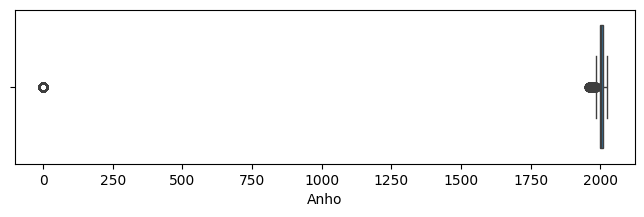

In [17]:
plt.figure(figsize=(8,2))
sns.boxplot(x="Anho", data=df1)
plt.show()

Ya que el porcentaje de registros que no tienen registrado el año no son muchos (aproximadamente el 4% de los datos), procederemos a eliminarlos de la base de datos.

In [18]:
"""Este codigo calcula los registros que contienen valores 0 para el atributo año, los filta, los cuenta y calcula su porcentaje dentro del total de registros"""
print(df1[df1["Anho"] == 0].shape[0] /df1.shape[0] * 100)


4.015925220702787


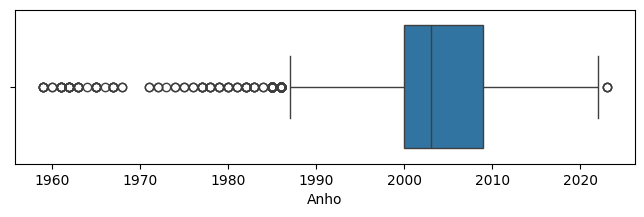

In [20]:
df2 = df1.drop(df1[df1["Anho"] == 0].index)
plt.figure(figsize=(8,2))
sns.boxplot(x="Anho", data=df2)
plt.show()


**Mes**

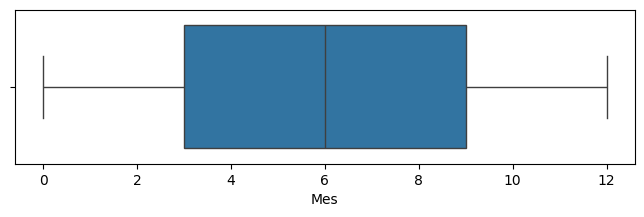

In [21]:
plt.figure(figsize=(8,2))
sns.boxplot(x="Mes", data=df2)
plt.show()

In [22]:
"""Este codigo calcula los registros que contienen valores 0 para el atributo mes, los filta, los cuenta y calcula su porcentaje dentro del total de registros"""
print(df2[df2["Mes"] == 0].shape[0] / df2.shape[0] * 100)

1.2984670874661857


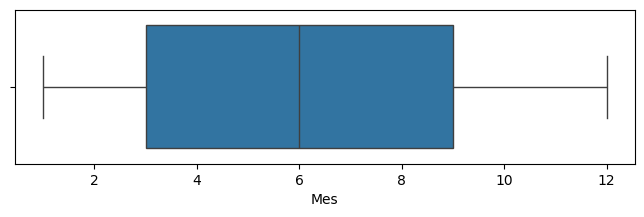

In [23]:
df3 = df2.drop(df2[df2["Mes"] == 0].index)
plt.figure(figsize=(8,2))
sns.boxplot(x="Mes", data=df3)
plt.show()

**Dia**

Se realizo una limpia para el caso del Dia, sin embargo esto se realizo mas con un fin exploratorio de los datos y visualizar las tendencias, en ese orden de ideas se conservara df3 que conserva los registros de los años y mes conocidos, que son informacion relevante para el analisis analitico del estudio aún si se desconoce el dia. 

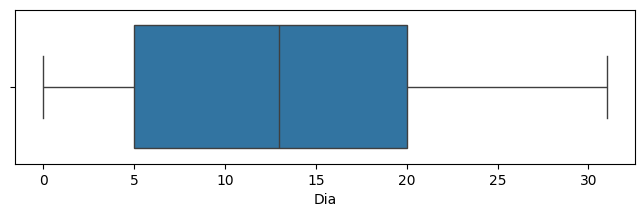

In [ ]:
plt.figure(figsize=(8,2))
sns.boxplot(x="Dia", data=df3)
plt.show()

In [20]:
"""Este codigo calcula los registros que contienen valores 0 para el atributo día, los filta, los cuenta y calcula su porcentaje dentro del total de registros"""
print(df3[df3["Dia"] == 0].shape[0] / df3.shape[0] * 100)

0.92575674523418


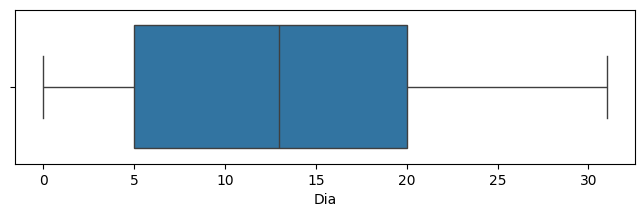

In [22]:
df4 = df3.drop(df3[df3["Dia"] == 0].index)
plt.figure(figsize=(8,2))
sns.boxplot(x="Dia", data=df3)
plt.show()

### **Analisis Descriptivo**

Para el análisis descriptivo, se extrajo inicialmente la moda de los atributos cuya tipología de dato es categórica. 

En relación a la variable **Edad**, se observa que la población más afectada por la violencia sexual corresponde a la Juventud, comprendida entre los 18 y 28 años según los registros obtenidos. Sin embargo, existe una población significativa, con 1582 registros, para los cuales esta característica es desconocida.

In [31]:
df3.groupby('Edad').size().sort_values(ascending=False)

Edad
JUVENTUD (18-28 AÑOS)            5290
ADULTEZ (29-59 AÑOS)             4466
ADOLESCENCIA (12-17 AÑOS)        3834
SIN INFORMACIÓN                  1582
INFANCIA (6-11 AÑOS)             1003
PRIMERA INFANCIA (0-5 AÑOS)       149
PERSONA MAYOR (60 AÑOS O MAS)      95
dtype: int64

Para el atributo **Estado** tenemos que en su mayoria (77,20%), no se tiene conocimiento sobre el estado de la victima despues de ser registrado el caso. 

In [30]:
df3.groupby('Estado').size().sort_values(ascending=False)


Estado
DESCONOCIDA             13372
VIVA                     2183
MUERTA                    853
ND                          7
DESAPARECIDO FORZADO        2
APARECIÓ MUERTO             1
MUERTO EN CAUTIVERIO        1
dtype: int64

Para la variable **Sexo** vemos que la poblacion mas afectada por la violencia sexual son las mujeres siendo un 85.95% de los registros tomados.

In [29]:
df3.groupby('Sexo').size().sort_values(ascending=False)

Sexo
MUJER              14893
HOMBRE              1495
SIN INFORMACION       31
dtype: int64

Para el atributo **Tipo de Victima** vemos que el dato mas común es que pertenezca a civil, es decir no estaba registrado como participante algun grupo armado ó definida como figura publica. 

In [28]:
df3.groupby('Tipo_Victima').size().sort_values(ascending=False)

Tipo_Victima
CIVIL              16364
COMBATIENTE           53
SIN INFORMACIÓN        2
dtype: int64

Al analizar la variable **Ocupación**, observamos una vez más que la categoría más frecuente es "SIN INFORMACIÓN", lo que indica la presencia de datos faltantes entre los registros. Además, notamos que la ocupación más recurrente es **CAMPESINO**, lo cual sugiere que uno de los grupos más afectados por este tipo de violencia se encuentra en el sector rural.

In [32]:
df3.groupby('Ocupacion').size().sort_values(ascending=False).head(5)


Ocupacion
SIN INFORMACIÓN        14776
CAMPESINO                430
COMERCIANTE              208
TRABAJADOR DE FINCA      202
ESTUDIANTE               172
dtype: int64

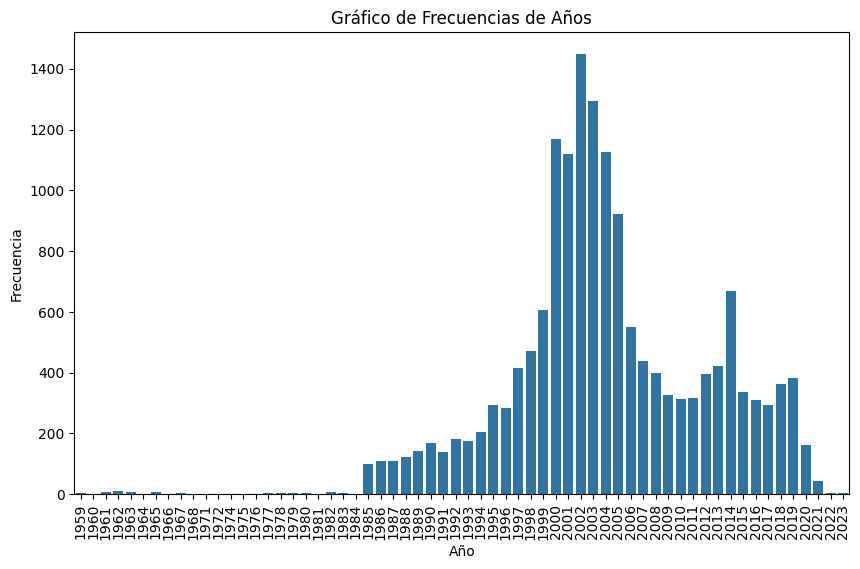

In [64]:
frecuencias = df3["Año"].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x=df3["Año"])
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.title("Gráfico de Frecuencias de Años")
plt.xticks(rotation=90)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27060\2552591664.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_por_mes.index, y=frecuencia_por_mes.values, palette=paleta_colores)


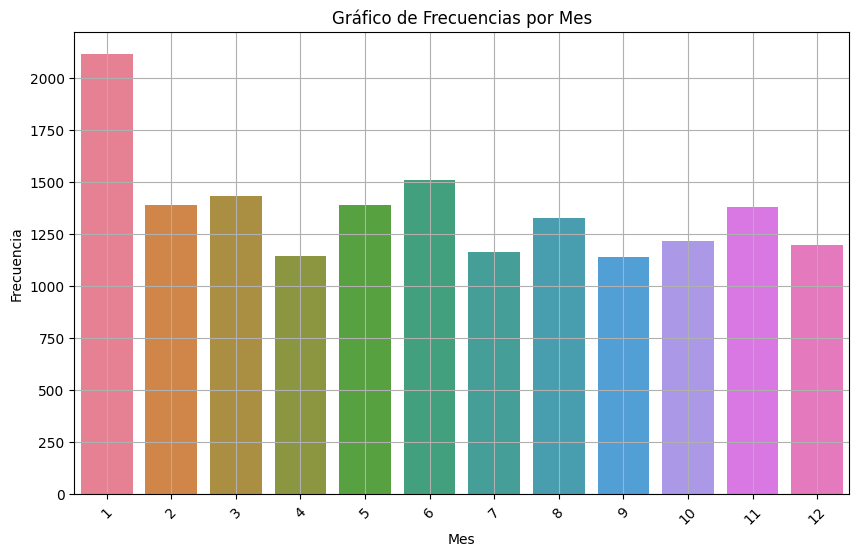

In [79]:
frecuencia_por_mes = df3["Mes"].value_counts().sort_index()
paleta_colores = sns.color_palette("husl", len(frecuencia_por_mes))
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_por_mes.index, y=frecuencia_por_mes.values, palette=paleta_colores)
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.title("Gráfico de Frecuencias por Mes")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 2500x600 with 0 Axes>

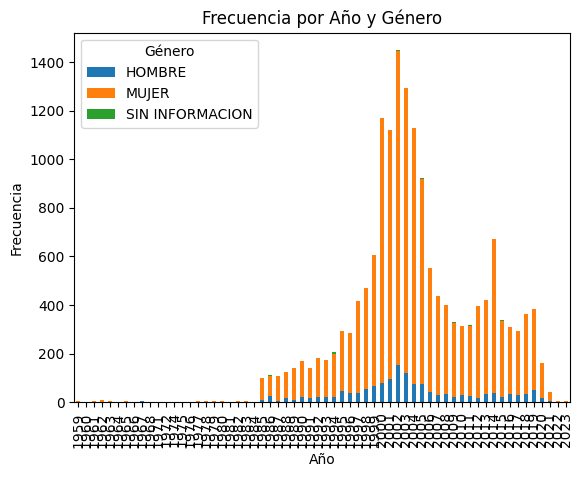

In [75]:
df_gender = df3.groupby(['Año', 'Sexo']).size().unstack(fill_value=0)
plt.figure(figsize=(25, 6))
df_gender.plot(kind='bar', stacked=True)
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.title("Frecuencia por Año y Género")
plt.xticks(rotation=90)
plt.legend(title="Género")
plt.show()

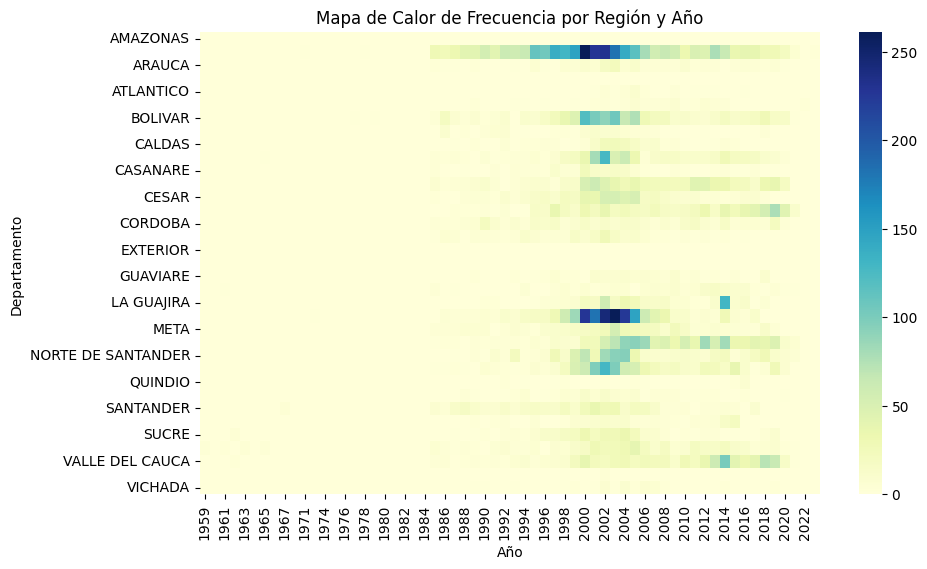

In [83]:
frecuencia_por_region = df3.groupby(['Departamento', 'Año']).size().reset_index(name='Frecuencia')
pivot_table = frecuencia_por_region.pivot(index='Departamento', columns='Año', values='Frecuencia').fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.xlabel("Año")
plt.ylabel("Departamento")
plt.title("Mapa de Calor de Frecuencia por Región y Año")
plt.show()



In [24]:
df2.to_csv('VictimasVS_1.csv', index=False)